<a href="https://colab.research.google.com/github/Sumingson/Python/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Ячейку, содержащую и отображающую информацию об исполнителе

- группа, фамилию, имя и отчество исполнителя

-  временную зону соответствующую Москве

- дату выполнения задания (программно)


2. Ячейку, обеспечивающую:

-  связь и обмен данными с Google-диском и другие манипуляции  обеспечивающие   связь с необходимыми ресурсами  на удаленном сервере

-  подробное отображение содержания папок со   всеми используемыми ресурсами

Ячейки, выполняющие оценивание элементов SWOT-анализа.
Для каждого из 4-х SWOT-элементов  :

3.  Создать таблицы c важнейшими индивидуальными  факторами (4-6) для  элементов SWOT-анализа  (аналогично созданным в MS Teams и на предшествующих занятиях) 

4.  Аналогично ранее обсуждаемому алгоритму,  написать коды обеспечивающие считывание данных и   дозаполнение таблиц

5.  Обеспечить  автоматическое представление полученных результатов в виде столбчатой или точечной диаграммы

6.  Обеспечить автоматическое отображение содержания изменяющихся факторов на диаграмме или в консоли  

 

7. Создать ячейку, обеспечивающую: 

- автоматическое представление и вычисление  данных в итоговой  таблице SWOT-анализа

- вычисление итоговых оценок

- представление полученных результатов в виде столбчатой или точечной диаграммы

- автоматическое отображение названий элементов на диаграмме или в консоли


Исполнитель: Соколов Владислав 20БИ-2

program was made by Vladislav Sokolov 20BI-2
 
Файлы используемые в номере
['task1.ipynb', 'table1.gsheet']
-rw------- 1 root 26603 Mar  3 23:42 /content/drive/MyDrive/swot/task1.ipynb
Wed Mar  3 23:46:33 MSK 2021

Работаем с таблицей
total 27
-rw------- 1 root   151 Mar  3 23:46 table1.gsheet
-rw------- 1 root 26603 Mar  3 23:42 task1.ipynb

Работаем с листом
[['Информация об исполнителе', 'Цель', '', 'Имя', 'Действие', 'Важность', 'Вероятность ', 'Итог', '', 'Имя', 'Действие', 'Важность', 'Вероятность ', 'Итог'], ['20БИ-2 Соколов Владислав Владимирович', 'Компания по перевозке тяжелых грузов', 'Strengths', '', '', '', '', '', 'Weaknesses', '', '', '', '', ''], ['', '', '1', 'Автопарк грузовиков, собственная парковка, мойка, мастерская', 'Использование этих ресурсов на повседневной основе', '10', '1', '10', '1', 'Нестабильность состава рабочих нижнего звена', 'Предоставление работникам полного соц пакета', '6', '0.5', '3'], ['', '', '2', 'Скллад запчастей для грузовиков', 'Ввести элек

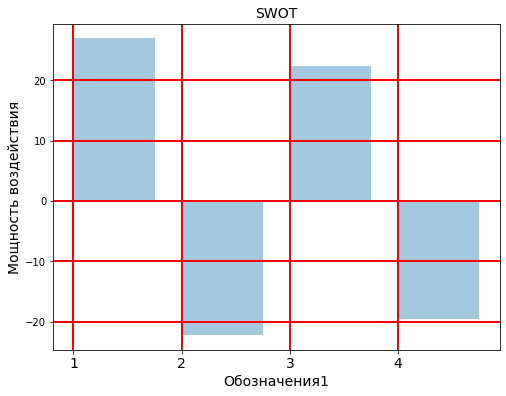

1 - Strengths 26.9   2 - Weaknesses -22.2   3 - Opportunities   22.4   4 - Threats -19.5
 
Конец
-rw------- 1 root 26603 Mar  3 23:42 /content/drive/MyDrive/swot/task1.ipynb


['task1.ipynb', 'table1.gsheet']

In [87]:
#program was made by Vladislav Sokolov 20BI-2
import json
import matplotlib.pyplot as plt
import os
import time
import gspread
from google.colab import auth
from google.colab import drive


print("program was made by Vladislav Sokolov 20BI-2")
print(" ")
auth.authenticate_user()


print("Файлы используемые в номере")
print(os.listdir('/content/drive/MyDrive/swot'))

%ll -lF /content/drive/MyDrive/"swot"/task1.ipynb
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date



print('\nРаботаем с таблицей')
%ll -lAF /content/drive/MyDrive/"swot"/
try:
  os.stat('/content/drive/MyDrive/swot/table1.gsheet')
  table = gs.open_by_key('1AptBtUewGhvpCu5PD0FN16XwyV9QRuKvJYFfaUPpkho')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать таблицу\n")
    %ll -lAF /content/drive/MyDrive/
    gs_01 = gs.create('table_01')
    %ll -lAF /content/drive/MyDrive/
    print(gs_01)
    print (gs_01.id)
    print(dir(gs_01))
    %ll -lAF /content/drive/MyDrive/"swot"/task1.ipynb
    %mv  /content/drive/MyDrive/table_01.gsheet /content/drive/MyDrive/"swot"/task1.ipynb
    %ll -lAF /content/drive/MyDrive/"swot"/task1.ipynb


print('\nРаботаем с листом')
try:
  worksheet = table.worksheet('first')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("list1",100,100)


rows = worksheet.get_all_values()
print(rows)


def summary(rows,x1,y1,x2,y2):
  result = 0
  for i in range(y1-1,y2):
    mult = int(rows[i][x1-1])*float(rows[i][x2-1])
    if x2==7:
      string = "H"+str(i+1)
      worksheet.update(string, mult)
    if x2==13:
      string = "N"+str(i+1)
      worksheet.update(string, mult)
    result +=mult

  if x2==7:
      string = "H"+str(y2+1)
  if x2==13:
      string = "N"+str(y2+1)
  worksheet.update(string, result)
  return result

s = summary(rows,6,3,7,6)
w = (-1)*summary(rows,12,3,13,6)
o = summary(rows,6,9,7,12)
t = (-1)*summary(rows,12,9,13,12)


y = [s,w,o,t]
x = [1,2,3,4,]
x_pos=list()
for i in range(x.__len__()):
        x_pos.append(i)


fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x, fontsize=14)
plt.xlabel('Обозначения1', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)
#plt.draw()
plt.show()
print("1 - Strengths",s,"  2 - Weaknesses",w,"  3 - Opportunities  ",o,"  4 - Threats",t)


print(" ")
print("Конец")
%ll -lAF /content/drive/MyDrive/"swot"/task1.ipynb
os.listdir('/content/drive/MyDrive/swot/')
